# Notebook #2: plotting the images for the paper

This notebook recreates all the radio / IR / spectral images from the paper. There are a number of caveats to keep in mind:

1) because aplpy does not easily allow for the changing of the colorbar labels, we manually adapt the values from Jy/bm to mJy/bm after creating the pdf image. This is listed wherever relevant.
2) at two points in the notebook, we refer to the other notebooks (#2a and #2b), which can be used to recreate the .fits files used in these steps. There fits files are, however, already included in this repository; these other notebook do not need to be used to run this main notebook.

We take the following steps:

0) Import the necessary packages and plotting settings
1) Plotting the full field image (Figure 1)
2) Plotting the zoomed image with contours (Figure 2)
3) Plotting the SUMMS image (Figure 5)
4) Plotting the 3x2 image with RACS bands, spectral constraints, and IR data (Figure 4):

### 0) import the necessary packages and plotting settings

In [1]:
path = '/Library/Fonts/Arial Unicode.ttf' # Change to local path!

import numpy as np
import numpy.ma as ma

import aplpy

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import matplotlib.gridspec as gridspec
from astropy.io import fits

import os
from astropy import units as u
from astropy.units import cds
from matplotlib import colors
cds.enable()  

# If the font should not be changed, comment out the next two lines:
prop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['pdf.fonttype']=42

params = {'text.usetex':False, 'mathtext.fontset':'custom', 'mathtext.default':'regular'}
mpl.rcParams.update(params)

single_col = 8.9 # cm
double_col = 18.3 # cm
def cm2inch(value):
    return value/2.54
FS = 22
LS = 22
MS = 14
MEW= 1.5

%matplotlib inline

### 1) Plotting the full field image (Figure 1)

First, we need to 'flatten' the image: remove the empty axes, so that aplpy can plot it:

In [8]:
# Unflattened image:
data_emu = './FITS_IMAGES/image.i.EMU_1136-64.SB46948.cont.taylor.0.highres.restored.conv.fits'

In [9]:
from astropy.io import fits
from astropy import wcs
import FITS_tools

# Read original file:
fh = fits.open(data_emu)
data = fh[0].data.squeeze() # drops the size-1 axes
header = fh[0].header
mywcs = wcs.WCS(header).celestial

# Save as new file with same header but flattened:
new_header = FITS_tools.strip_headers.flatten_header(header)
new_fh = fits.PrimaryHDU(data=data, header=new_header)
new_fh.writeto('./FITS_IMAGES/EMU_flattened.fits', overwrite=True)

Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Plotting the flattened full field image

In [10]:
data_emu_flat = './FITS_IMAGES/EMU_flattened.fits'

Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


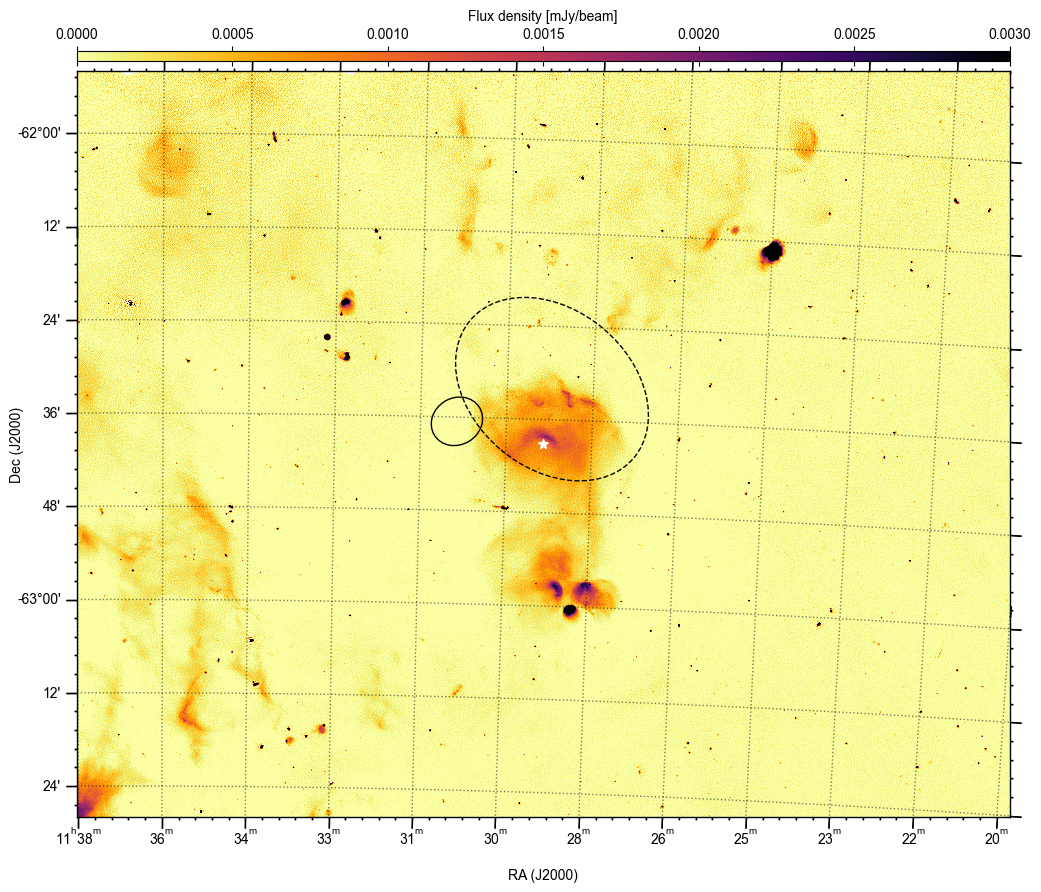

In [11]:
# Set the colormap
CM = 'inferno_r' 

# Define the image and the size:
fig = plt.figure(figsize=(3*cm2inch(single_col),3*cm2inch(single_col)))
plt.clf()

# Plot the map in the defined figure
cg = aplpy.FITSFigure(data_emu_flat, figure=fig, subplot=(1,1,1))#, dimensions=[0,1], slices=[0,0])

# Define the colormaps, min and max flux on the log scale: 
cg.show_colorscale(cmap=CM,vmin=0,vmax=0.003, stretch='linear')

# Centre on this position:
ra = 172.225759	
dec = -62.652733
    
cg.recenter(ra, dec, width=2., height=1.6)  # radius of the image in degrees

# Indicate the position:
cg.show_markers(ra, dec, layer='marker_set_1', 
                edgecolor=None, facecolor='w', marker='*', s=50)

# Plot the Fermi ellipses: these are defined using DS9 and saved in the REGIONS folder:
cg.show_regions('./REGIONS/fermi_black1dash_EMU.reg')
cg.show_regions('./REGIONS/fermi_4FGL_black1line_EMU.reg')

# Set the properties of the axis labels and ticks:
cg.axis_labels.set_xpad(2)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=10, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=10, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(8)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')
cg.ticks.set_xspacing(0.4)  # degrees
cg.ticks.set_yspacing(0.2)

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

# Define the properties of the grid
cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

# Colorbar: 
cg.add_colorbar()
cg.colorbar.set_location('top')
cg.colorbar.set_width(0.1)
cg.colorbar.set_pad(0.1)
cg.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg.colorbar.set_axis_label_text(r'Flux density [mJy/beam]')
cg.colorbar.set_axis_label_font(size=10)
cg.colorbar.set_axis_label_pad(5)

cg.colorbar.set_label_properties()

# Save the image:
plt.tight_layout()
plt.savefig('./PDF_IMAGES/EMU_LS2355_FULL.pdf')
# Note: because we manually adjust the labels of the colorbar to the correct mJy/bm units (using Keynote), the final file included in 
# paper is called EMU_LS2355_FULL_labels.pdf

### 2) Plotting the zoomed image with contours (Figure 2)

To re-create the image called here, run the 'cutouts_EMU_image.ipynb' notebook.

In [14]:
# Use this cropped one since it will speed up plotting all contours
data_emu_flat_cropped = './FITS_IMAGES/EMU_flattened_cropped.fits'

Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 fro

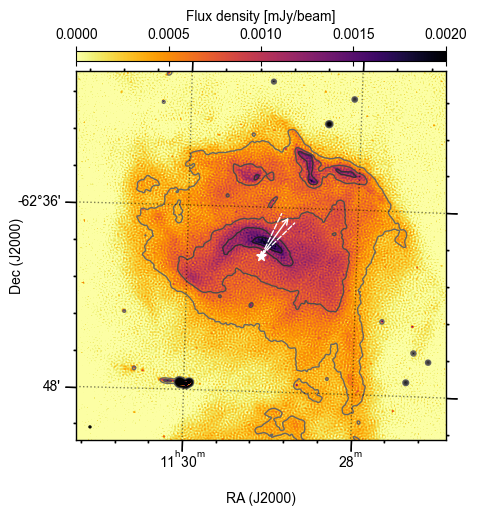

In [15]:
# Set the colormap
CM = 'inferno_r' 

# Define the image and the size:
fig = plt.figure(figsize=(1.5*cm2inch(single_col),1.5*cm2inch(single_col)))
plt.clf()

# Plot the map in the defined figure
cg = aplpy.FITSFigure(data_emu_flat_cropped, figure=fig, subplot=(1,1,1))#, dimensions=[0,1], slices=[0,0])

# Define the colormaps, min and max flux on the log scale: 
cg.show_colorscale(cmap=CM,vmin=0,vmax=0.002, stretch='linear')

# Centre on this position:
ra = 172.225759	
dec = -62.652733
    
cg.recenter(ra, dec, radius=0.2, )  # radius of the image in degrees; zoomed in significantly.

# Showing LS 2355
cg.show_markers(ra, dec, layer='marker_set_1', 
                edgecolor=None, facecolor='w', marker='*', s=50)

# showing the motion and its errors: defined priorly in DS9:
cg.show_regions('./REGIONS/motion_icrs_v3.reg')
cg.show_regions('./REGIONS/motion_icrs_v3_err1.reg')
cg.show_regions('./REGIONS/motion_icrs_v3_err2.reg')

# Show the contours:
cg.show_contour(levels=[3.75e-4, 7.5e-4, 1.125e-3, 1.5e-3, 1.975e-3], filled=False, 
                colors=('0.4', '0.3', '0.2', '0.1', '0.0'),
                returnlevels=False, smooth=3, kernel='gauss', linewidths=1)

# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(7.9 * u.arcsecond)
cg.beam.set_minor(7.3 * u.arcsecond)
cg.beam.set_angle(75.6 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Set the properties of the axis labels and ticks:
cg.axis_labels.set_xpad(2)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=10, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=10, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(8)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')
cg.ticks.set_xspacing(0.4)  # degrees
cg.ticks.set_yspacing(0.2)

cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

# Define the properties of the grid
cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

# Colorbar: 
cg.add_colorbar()
cg.colorbar.set_location('top')
cg.colorbar.set_width(0.1)
cg.colorbar.set_pad(0.1)
cg.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg.colorbar.set_axis_label_text(r'Flux density [mJy/beam]')
cg.colorbar.set_axis_label_font(size=10)
cg.colorbar.set_axis_label_pad(5)
cg.colorbar.set_ticks([0,0.0005, 0.001, 0.0015, 0.002])

cg.colorbar.set_label_properties()

# Save the image:
plt.tight_layout()
plt.savefig('./PDF_IMAGES/EMU_LS2355_ZOOM.pdf')

# Note: because we manually adjust the labels of the colorbar to the correct mJy/bm units (using Keynote), the final file included in 
# paper is called EMU_LS2355_ZOOM_labels.pdf

### 3) Plotting the SUMMS image (Figure 5)

In [18]:
# The data: directly from the SUMMS data repository:
data_sumss = './FITS_IMAGES/SUMSS_J1130M64.FITS'

Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/var/folders/lv/pjzz9j2j0l3c_7hb6_61m_yr0000gn/T/ipykernel_61357/2066661090.py:71: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(fakedata,aspect='auto',origin='lower',vmin=0,vmax=60,


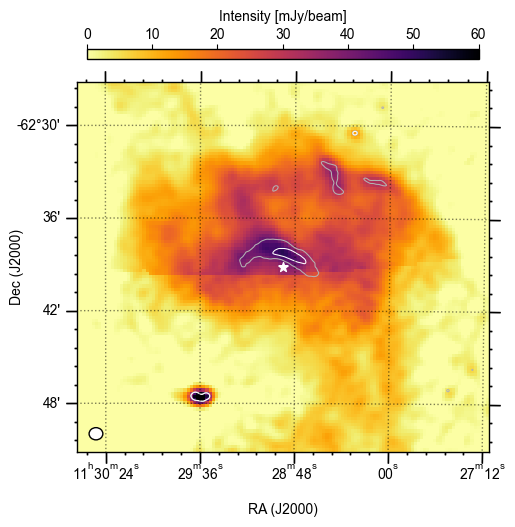

In [19]:
# Set the colormap
CM = 'inferno_r' 

# Define the image and the size:
fig = plt.figure(figsize=(1.5*cm2inch(single_col),1.5*cm2inch(single_col)))
plt.clf()

# Plot the map in the defined figure
cg = aplpy.FITSFigure(data_sumss, figure=fig, subplot=(1,1,1))#, dimensions=[0,1], slices=[0,0])

# Define the colormaps, min and max flux on the log scale: 
cg.show_colorscale(cmap=CM,vmin=0,vmax=0.06, stretch='linear')

# Centre on this position:
ra = 172.225759	
dec = -62.652733

cg.recenter(ra, dec, radius=0.2, )  # radius of the image in degrees

# Shown LS 2355
cg.show_markers(ra, dec, layer='marker_set_1', 
                edgecolor=None, facecolor='w', marker='*', s=50)

# SHow the peak contours from EMU:
cg.show_contour(data=data_emu_flat_cropped, levels=[1.125e-3, 1.5e-3], filled=False, 
                colors=('0.7', '1.0'),
                returnlevels=False, smooth=3, kernel='gauss', linewidths=0.75)

# Add the beam
cg.add_beam()
cg.beam.show()
cg.beam.set_major(45 * u.arcsecond)
cg.beam.set_minor(1./np.sin(-1.*dec*u.degree) * 45 * u.arcsecond)
cg.beam.set_angle(0 * u.degree)
cg.beam.set_corner('bottom left')
cg.beam.set_linestyle('-')
cg.beam.set_edgecolor('k')
cg.beam.set_facecolor('w')
cg.beam.set_linewidth(1)

# Set the properties of the axis labels and ticks:
cg.axis_labels.set_xpad(2)
cg.axis_labels.set_ypad(0)
cg.axis_labels.set_font(size=10, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.tick_labels.set_font(size=10, weight='medium',
                         stretch='normal', family='arial',
                         style='normal', variant='normal')
cg.ticks.set_length(8)
cg.ticks.set_linewidth(1)
cg.ticks.set_color('black')
cg.ticks.set_xspacing(0.2)  # degrees
cg.ticks.set_yspacing(0.1)
cg.frame.set_linewidth(1)  # points
cg.frame.set_color('black')

# Define the properties of the grid
cg.add_grid()
cg.grid.show()
cg.grid.set_color('k')
cg.grid.set_linestyle(':')
cg.grid.set_linewidth(1)

#### NOTE: the below is an alternative way to create the colorbar with more control; a bit of a workaround! ####

# To define a colorbar properly, we create a fake axis and plot an empty dataset with imshow (with the same range
# and colormap as the real image)
ax = fig.add_subplot(111)
fakedata = np.asarray([[],[]])
plt.imshow(fakedata,aspect='auto',origin='lower',vmin=0,vmax=60,
           cmap=CM,rasterized=True)#,norm=colors.LinNorm())

# Making the colorbar using the 'empty' imshow image.
cb = plt.colorbar(orientation='horizontal', cmap=CM, shrink=0.95, aspect=40, pad=0, 
                  fraction=1.07,drawedges=True)

cb.set_label(r'Intensity [mJy/beam]', fontsize=10, fontweight='medium', family='arial', labelpad=5)
cb.ax.xaxis.set_tick_params(pad=2)
cb.ax.tick_params(labelsize=10) 
cb.outline.set_linewidth(1)
cb.dividers.set_color('none')

# Make sure the color bar has ticks and labels at the top, since the bar is on the top as well. 
cb.ax.xaxis.set_ticks_position('top')
cb.ax.xaxis.set_label_position('top')

for l in cb.ax.xaxis.get_ticklabels():
    l.set_family("arial")
    
# Remove the axis for the 'empty' plot, that is only there for the colorbar.
ax.axis('off')

# Save the image:
plt.tight_layout()
plt.savefig('./PDF_IMAGES/SUMMS_LS2355.pdf')

### 4) Plotting the 3x2 image with RACS bands, spectral constraints, and IR data (Figure 4):

Note that the spectral index maps can be created using the spectrum.ipynb notebook

In [20]:
# Defining the data:
RACS_low = './FITS_IMAGES/RACS-LOW.cropped.fits'
RACS_mid = './FITS_IMAGES/RACS-MID.cropped.fits'
alpha = './FITS_IMAGES/alpha.fits'
dalpha = './FITS_IMAGES/dalpha.fits'
data_WISE_W4 = './FITS_IMAGES/WISE_W4_1736m621.fits'
data_WISE_W3 = './FITS_IMAGES/WISE_W3_1736m621.fits'

Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -26.704100 from OBSGEO-[XYZ].
Set OBSGEO-H to      121.995 fro

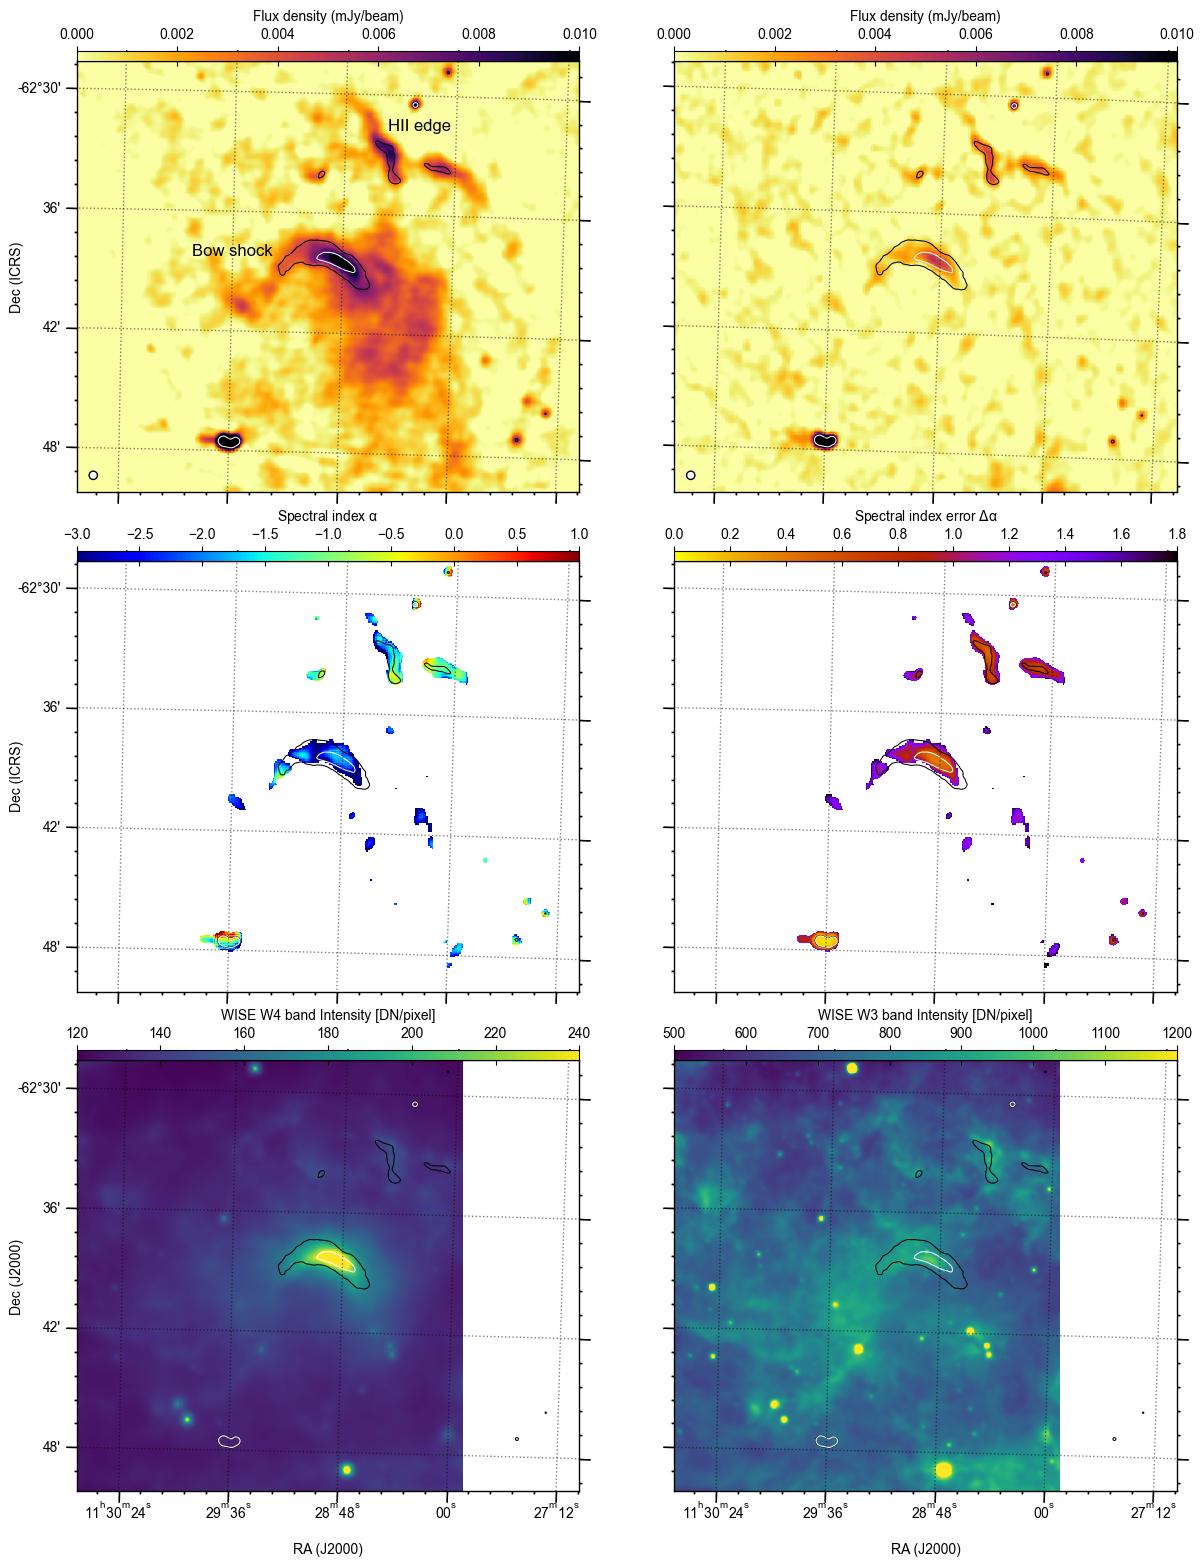

In [21]:
# Set the colormap
CM = 'inferno_r' 

# Define the image and the size:
fig = plt.figure(figsize=(3.6*cm2inch(single_col),4.5*cm2inch(single_col)))
plt.clf()

# Adding all data:
cg1 = aplpy.FITSFigure(RACS_low, figure=fig, subplot=(3,2,1))#, dimensions=[0,1], slices=[0,0])
cg2 = aplpy.FITSFigure(RACS_mid, figure=fig, subplot=(3,2,2))#, dimensions=[0,1], slices=[0,0])
cg3 = aplpy.FITSFigure(alpha, figure=fig, subplot=(3,2,3))#, dimensions=[0,1], slices=[0,0])
cg4 = aplpy.FITSFigure(dalpha, figure=fig, subplot=(3,2,4))#, dimensions=[0,1], slices=[0,0])
cg5 = aplpy.FITSFigure(data_WISE_W4, figure=fig, subplot=(3,2,5))
cg6 = aplpy.FITSFigure(data_WISE_W3, figure=fig, subplot=(3,2,6))

# Looping over axes with the parts that stay the same:
for cg in [cg1, cg2, cg3, cg4, cg5, cg6]:
    # Centre on this position:
    ra = 172.225759	
    dec = -62.652733
        
    cg.recenter(ra, dec, width=0.42, height=0.36) # radius of the image in degrees

    cg.axis_labels.set_xpad(2)
    cg.axis_labels.set_ypad(0)
    cg.axis_labels.set_font(size=10, weight='medium',
                             stretch='normal', family='arial',
                             style='normal', variant='normal')
    cg.tick_labels.set_font(size=10, weight='medium',
                             stretch='normal', family='arial',
                             style='normal', variant='normal')
    cg.ticks.set_length(8)
    cg.ticks.set_linewidth(1)
    cg.ticks.set_color('black')
    cg.ticks.set_xspacing(0.2)  # degrees
    cg.ticks.set_yspacing(0.1)
    
    cg.frame.set_linewidth(1)  # points
    cg.frame.set_color('black')
    
    # Define the properties of the grid
    cg.add_grid()
    cg.grid.show()
    cg.grid.set_color('k')
    cg.grid.set_linestyle(':')
    cg.grid.set_linewidth(1)

    # Show the main two EMU contours:
    cg.show_contour(data=data_emu_flat_cropped, levels=[1.125e-3, 1.5e-3], filled=False, 
                    colors=('0.', '1.0'),
                    returnlevels=False, smooth=3, kernel='gauss', linewidths=0.75)

###### Adjustments per frame:

##### FRAME 1 #####

# Define the colormaps, min and max flux on the log scale: 
cg1.show_colorscale(cmap=CM,vmin=0,vmax=0.010, stretch='linear')

cg1.tick_labels.hide_x()
cg1.axis_labels.hide_x()

# Add the beam
cg1.add_beam()
cg1.beam.show()
cg1.beam.set_major(25 * u.arcsecond)
cg1.beam.set_minor(25 * u.arcsecond)
cg1.beam.set_angle(0 * u.degree)
cg1.beam.set_corner('bottom left')
cg1.beam.set_linestyle('-')
cg1.beam.set_edgecolor('k')
cg1.beam.set_facecolor('w')
cg1.beam.set_linewidth(1)

cg1.add_colorbar()
cg1.colorbar.set_location('top')
cg1.colorbar.set_width(0.1)
cg1.colorbar.set_pad(0.)
cg1.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg1.colorbar.set_axis_label_text(r'Flux density (mJy/beam)')
cg1.colorbar.set_axis_label_font(size=10)
cg1.colorbar.set_axis_label_pad(5)
cg1.colorbar.set_labels(['0','2','4','6','8','10'])

cg1.add_label(172.400000, -62.633333, 'Bow shock', size=12)
cg1.add_label(172.066667, -62.525000, 'HII edge', size=12)

##### FRAME 2 #####

# Define the colormaps, min and max flux on the log scale: 
cg2.show_colorscale(cmap=CM,vmin=0,vmax=0.010, stretch='linear')

cg2.tick_labels.hide_x()
cg2.axis_labels.hide_x()
cg2.tick_labels.hide_y()
cg2.axis_labels.hide_y()

cg2.add_colorbar()
cg2.colorbar.set_location('top')
cg2.colorbar.set_width(0.1)
cg2.colorbar.set_pad(0.)
cg2.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg2.colorbar.set_axis_label_text(r'Flux density (mJy/beam)')
cg2.colorbar.set_axis_label_font(size=10)
cg2.colorbar.set_axis_label_pad(5)
cg2.colorbar.set_labels([0,2,4,6,8,10])

#cg2.colorbar.set_label_properties()

# Add the beam
cg2.add_beam()
cg2.beam.show()
cg2.beam.set_major(25 * u.arcsecond)
cg2.beam.set_minor(25 * u.arcsecond)
cg2.beam.set_angle(0 * u.degree)
cg2.beam.set_corner('bottom left')
cg2.beam.set_linestyle('-')
cg2.beam.set_edgecolor('k')
cg2.beam.set_facecolor('w')
cg2.beam.set_linewidth(1)

##### FRAME 3 #####

# Define the colormaps, min and max flux on the log scale: 
cg3.show_colorscale(cmap='jet',vmin=-3,vmax=1, stretch='linear')

cg3.add_colorbar()
cg3.colorbar.set_location('top')
cg3.colorbar.set_width(0.1)
cg3.colorbar.set_pad(0.)
cg3.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg3.colorbar.set_axis_label_text(r'Spectral index $\alpha$')
cg3.colorbar.set_axis_label_font(size=10)
cg3.colorbar.set_axis_label_pad(5)

cg3.colorbar.set_label_properties()

cg3.tick_labels.hide_x()
cg3.axis_labels.hide_x()

##### FRAME 4 #####

# Define the colormaps, min and max flux on the log scale: 
cg4.show_colorscale(cmap='gnuplot_r',vmin=0,vmax=1.8, stretch='linear')

cg4.add_colorbar()
cg4.colorbar.set_location('top')
cg4.colorbar.set_width(0.1)
cg4.colorbar.set_pad(0.)
cg4.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg4.colorbar.set_axis_label_text(r'Spectral index error $\Delta\alpha$')
cg4.colorbar.set_axis_label_font(size=10)
cg4.colorbar.set_axis_label_pad(5)

cg4.colorbar.set_label_properties()

cg4.tick_labels.hide_y()
cg4.axis_labels.hide_y()
cg4.tick_labels.hide_x()
cg4.axis_labels.hide_x()

##### FRAME 5 #####

cg5.show_colorscale(cmap='viridis' ,vmin=120,vmax=240, stretch='linear')

cg5.add_colorbar()
cg5.colorbar.set_location('top')
cg5.colorbar.set_width(0.1)
cg5.colorbar.set_pad(0.)
cg5.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg5.colorbar.set_axis_label_text(r'WISE W4 band Intensity [DN/pixel]')
cg5.colorbar.set_axis_label_font(size=10)
cg5.colorbar.set_axis_label_pad(5)

cg5.colorbar.set_label_properties()

##### FRAME 6 #####

cg6.show_colorscale(cmap='viridis' ,vmin=500,vmax=1200, stretch='linear')

cg6.add_colorbar()
cg6.colorbar.set_location('top')
cg6.colorbar.set_width(0.1)
cg6.colorbar.set_pad(0.)
cg6.colorbar.set_font(size=10, weight='medium', 
                     stretch='normal', family='arial', 
                     style='normal', variant='normal')
cg6.colorbar.set_axis_label_text(r'WISE W3 band Intensity [DN/pixel]')
cg6.colorbar.set_axis_label_font(size=10)
cg6.colorbar.set_axis_label_pad(5)

cg6.colorbar.set_label_properties()

cg6.tick_labels.hide_y()
cg6.axis_labels.hide_y()

# Save the image:
plt.tight_layout()
plt.savefig('./PDF_IMAGES/sixpanels.pdf')

# Note: because we manually adjust the labels of the colorbar to the correct mJy/bm units (using Keynote), the final file included in 
# paper is called sixpanels_cb.pdf